In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [4]:
df['arrival_date_year'] = df['arrival_date_year'].astype('object')

df['arrival_date_month'] = df['arrival_date_month'].astype('object')

df['arrival_date_week_number'] = df['arrival_date_week_number'].astype('object')

df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('object')

df['agent'] = df['agent'].astype('object')

df['company'] = df['company'].astype('object')

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df['children'].fillna(0,inplace=True)#reduce null value

In [7]:
working_data = df.copy()

In [8]:
working_data.shape

(119390, 32)

In [9]:
working_data = working_data[working_data['adr'] > 0]#"ADR" is average daily rate which can't be less than 0.
working_data = working_data[working_data['adr'] <= 252] 

In [10]:
working_data.shape

(116262, 32)

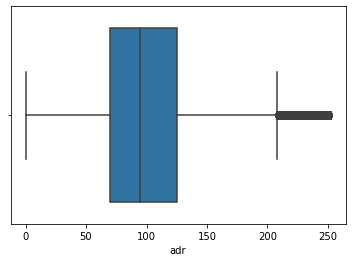

In [11]:
sns.boxplot(working_data['adr']);

In [12]:
outliers_columns = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adr']

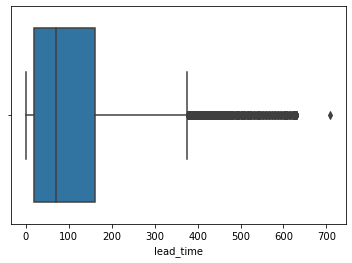

In [13]:
sns.boxplot(working_data['lead_time']);

In [14]:
working_data['lead_time'].quantile(0.9999)#0.999分位数

629.0

##445 is the largest value we'll consider for our analysis. 
##Lead time is the difference between the number of days at the time of online booking and checking-in.

##From the boxplot and the quantile point considering the observations less than  and equal to 445

In [15]:
working_data = working_data[working_data['lead_time'] <= 445]

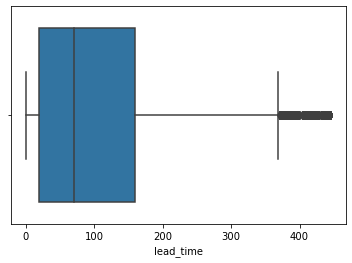

In [16]:
sns.boxplot(working_data['lead_time']);

In [17]:
working_data['stays_in_weekend_nights'].quantile(0.99)

4.0

<AxesSubplot:xlabel='stays_in_weekend_nights'>

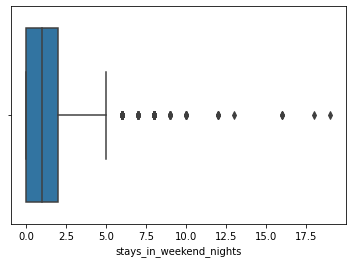

In [18]:
sns.boxplot(working_data['stays_in_weekend_nights'])

In [19]:
#From the boxplot and the quantile point considering the observations less than  and equal to 4
working_data = working_data[working_data['stays_in_weekend_nights'] <= 4]

In [20]:
working_data.shape

(114769, 32)

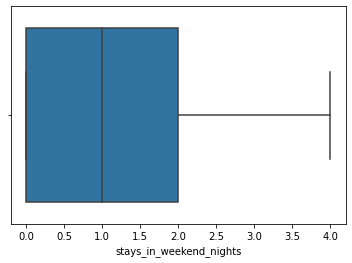

In [21]:
sns.boxplot(working_data['stays_in_weekend_nights']);

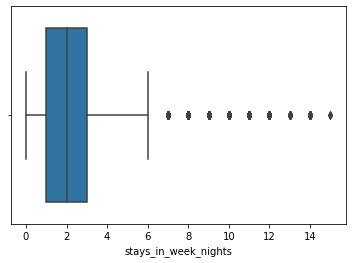

In [22]:
sns.boxplot(working_data['stays_in_week_nights']);

In [23]:
working_data['stays_in_week_nights'].quantile(0.9)

5.0

In [24]:
working_data = working_data[working_data['stays_in_week_nights'] <= 6]
working_data.shape

(111828, 32)

In [25]:
df_num = working_data.select_dtypes(include = np.number)
df_num.columns

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

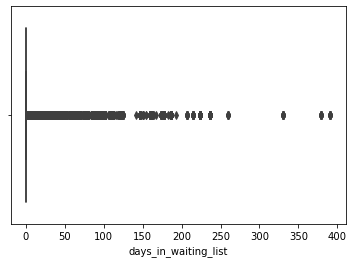

In [26]:
sns.boxplot(working_data['days_in_waiting_list']);

In [27]:
working_data['days_in_waiting_list'].quantile(0.99)

77.0

In [28]:
working_data = working_data[working_data['days_in_waiting_list'] <= 77]
working_data.shape

(110766, 32)

#feather engineering

In [30]:
df2=working_data.copy()
df2["seasons"]=df2["arrival_date_month"].map({"March":'Spring',
                                            "April":'Spring',
                                            "May":'Spring',
                                            "June":'summer',
                                            "July":'summer',
                                            "August":'summer',
                                            "September":'Autumn',
                                            "October":'Autumn',
                                            "November":'Autumn',
                                            "December":'Winter',
                                            "January":'Winter',
                                            "February":'Winter'})

In [31]:
df2 = df2.drop(['agent','company'], axis=1)
df2 = df2.drop(['arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month'], axis=1)
df2 = df2.drop('reservation_status_date', axis=1)

In [32]:
df2 = df2.drop(['country','arrival_date_year'],axis=1)

In [33]:
df2['Desired_Room'] = np.where(df2['reserved_room_type'] == df2['assigned_room_type'], 1, 0)

In [34]:
df2 = df2.drop(['reserved_room_type','assigned_room_type'], axis=1)

In [35]:
df2['total_bookings'] = df2['previous_cancellations']+ df2['previous_bookings_not_canceled']
df2['is_repeated_guest'] = np.where(df2['previous_bookings_not_canceled'] > 1, 1, 0)

In [36]:
df2 = df2.drop(['previous_cancellations','previous_bookings_not_canceled'], axis=1)

In [37]:
df2.shape

(110766, 23)

In [38]:
df2['distribution_channel'].value_counts()

TA/TO        91177
Direct       13042
Corporate     6355
GDS            187
Undefined        5
Name: distribution_channel, dtype: int64

In [39]:
# Replacing the Undefined 
df2['distribution_channel'] = np.where(df2['distribution_channel']== "Undefined", "TA/TO", df2['distribution_channel'])

In [40]:
df2['distribution_channel'].value_counts()

TA/TO        91182
Direct       13042
Corporate     6355
GDS            187
Name: distribution_channel, dtype: int64

In [41]:
df2['meal'].value_counts()

BB           86172
HB           12527
SC           10324
Undefined     1018
FB             725
Name: meal, dtype: int64

In [42]:
#Replacing the Undefined in meal with SC (no meal package)
df2['meal'] = np.where(df2['meal']== "Undefined", "SC", df2['meal'])

In [43]:
df2['meal'].value_counts()

BB    86172
HB    12527
SC    11342
FB      725
Name: meal, dtype: int64

In [44]:
df2['market_segment'].value_counts()

Online TA        53959
Offline TA/TO    21775
Groups           17974
Direct           11658
Corporate         5127
Aviation           208
Complementary       63
Undefined            2
Name: market_segment, dtype: int64

In [45]:
df2['market_segment'] = np.where(df2['market_segment']== "Undefined", "Online TA", df2['market_segment'])

In [46]:
df2['market_segment'].value_counts()

Online TA        53961
Offline TA/TO    21775
Groups           17974
Direct           11658
Corporate         5127
Aviation           208
Complementary       63
Name: market_segment, dtype: int64

In [47]:
print(df2.shape)
df2.head()

(110766, 23)


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,seasons,Desired_Room,total_bookings
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,Direct,...,No Deposit,0,Transient,75.0,0,0,Check-Out,summer,0,0
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,Corporate,...,No Deposit,0,Transient,75.0,0,0,Check-Out,summer,1,0
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,Online TA,...,No Deposit,0,Transient,98.0,0,1,Check-Out,summer,1,0
5,Resort Hotel,0,14,0,2,2,0.0,0,BB,Online TA,...,No Deposit,0,Transient,98.0,0,1,Check-Out,summer,1,0
6,Resort Hotel,0,0,0,2,2,0.0,0,BB,Direct,...,No Deposit,0,Transient,107.0,0,0,Check-Out,summer,1,0


In [48]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'seasons',
       'Desired_Room', 'total_bookings'],
      dtype='object')

#Statistics for Significance and Normality Test.

In [49]:
df_stat=df2.copy() 

In [50]:
df_stat.dtypes

hotel                           object
is_canceled                      int64
lead_time                        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
children                       float64
babies                           int64
meal                            object
market_segment                  object
distribution_channel            object
is_repeated_guest                int32
booking_changes                  int64
deposit_type                    object
days_in_waiting_list             int64
customer_type                   object
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
reservation_status              object
seasons                         object
Desired_Room                     int32
total_bookings                   int64
dtype: object

In [51]:
df_stat.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'seasons',
       'Desired_Room', 'total_bookings'],
      dtype='object')

In [52]:
df_num=df_stat[['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests',
        'total_bookings']]

In [53]:
df_cat=df_stat[['hotel', 'is_canceled', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
      'deposit_type', 'reservation_status',
       'customer_type','seasons',
       'Desired_Room']]

In [54]:
df_num.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_bookings
2,7,0,1,1,0.0,0,0,0,75.0,0,0,0
3,13,0,1,1,0.0,0,0,0,75.0,0,0,0
4,14,0,2,2,0.0,0,0,0,98.0,0,1,0
5,14,0,2,2,0.0,0,0,0,98.0,0,1,0
6,0,0,2,2,0.0,0,0,0,107.0,0,0,0


In [55]:
df_cat.head()

,hotel,is_canceled,meal,market_segment,distribution_channel,is_repeated_guest,deposit_type,reservation_status,customer_type,seasons,Desired_Room
2,Resort Hotel,0,BB,Direct,Direct,0,No Deposit,Check-Out,Transient,summer,0
3,Resort Hotel,0,BB,Corporate,Corporate,0,No Deposit,Check-Out,Transient,summer,1
4,Resort Hotel,0,BB,Online TA,TA/TO,0,No Deposit,Check-Out,Transient,summer,1
5,Resort Hotel,0,BB,Online TA,TA/TO,0,No Deposit,Check-Out,Transient,summer,1
6,Resort Hotel,0,BB,Direct,Direct,0,No Deposit,Check-Out,Transient,summer,1


In [56]:
X=df_cat.drop("is_canceled", axis=1)

In [57]:
#chi2_contingency #验证两个类别变量是否独立，还是相关
#𝐻0 : The variables are independent / insignificant
#𝐻1: The variables are not independent (i.e. variables are dependent) / significant
from scipy.stats import chi2_contingency

for var in X:
    table = pd.crosstab(df_stat["is_canceled"], df_stat[var],normalize='columns')
    observed_value = table.values
    test_stat, p_value, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
    print("{}: {}: ".format(var,p_value))

hotel: 0.8410780049562139: 
meal: 0.9709331988419929: 
market_segment: 0.9874136826345024: 
distribution_channel: 0.9786743806894651: 
is_repeated_guest: 0.5843552011431903: 
deposit_type: 0.4743041131572474: 
reservation_status: 0.22313016014842982: 
customer_type: 0.9545366447770954: 
seasons: 0.9996530134361622: 
Desired_Room: 0.545462920071403: 


#We observe that the p_values of all the columns are greater than 0.05. Hence, we fail to reject the null hypothesis. Therefore, we conclude that all the categorical features are not significant as per the chi2_contingency test.

In [59]:
#Shapiro-Wilk normality test
#H0: The data is normally distributed
#H1: The data is not normally distributed
#Checking the normality of numeric variables.
#To check weather parametric or non-parametric need to be perform.
df_1=df_stat[df_stat['is_canceled'] == 1]#取消
df_0=df_stat[df_stat['is_canceled'] == 0]#不取消

In [60]:
df_1_1=df_1[['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests',
        'total_bookings']]
df_0_0=df_0[['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests',
        'total_bookings']]

In [61]:
from scipy import stats
for var in df_num:
    stat, p_value = stats.shapiro(df_num[var])
    print("{}: {}: ".format(var,p_value))

lead_time: 0.0: 
stays_in_weekend_nights: 0.0: 
stays_in_week_nights: 0.0: 
adults: 0.0: 
children: 0.0: 
babies: 0.0: 
booking_changes: 0.0: 
days_in_waiting_list: 0.0: 
adr: 0.0: 
required_car_parking_spaces: 0.0: 
total_of_special_requests: 0.0: 
total_bookings: 0.0: 


In [62]:
from scipy import stats
for var in df_1_1:
    stat, p_value = stats.shapiro(df_1_1[var])
    print("{}: {}: ".format(var,p_value))

lead_time: 0.0: 
stays_in_weekend_nights: 0.0: 
stays_in_week_nights: 0.0: 
adults: 0.0: 
children: 0.0: 
babies: 0.0: 
booking_changes: 0.0: 
days_in_waiting_list: 0.0: 
adr: 0.0: 
required_car_parking_spaces: 1.0: 
total_of_special_requests: 0.0: 
total_bookings: 0.0: 


In [63]:
from scipy import stats
for var in df_0_0:
    stat, p_value = stats.shapiro(df_0_0[var])
    print("{}: {}: ".format(var,p_value))

lead_time: 0.0: 
stays_in_weekend_nights: 0.0: 
stays_in_week_nights: 0.0: 
adults: 0.0: 
children: 0.0: 
babies: 0.0: 
booking_changes: 0.0: 
days_in_waiting_list: 0.0: 
adr: 0.0: 
required_car_parking_spaces: 0.0: 
total_of_special_requests: 0.0: 
total_bookings: 0.0: 


In [64]:
#From the above we can see that all are not noramlly distributed.
#So going with non parametric Kruskal-Wallis H Test
#Kruskal-Wallis H Tes检验两个以上样本是否来自 同一个概率分布的一种非参数方法
#p <= alpha: reject H0, different distribution.
#p > alpha: fail to reject H0, same distribution.
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal
seed(1)

for var in df_num:
    stat, p_value = stats.kruskal(df_1[var], df_0[var])
    print("{}: {}: ".format(var,p_value))

lead_time: 0.0: 
stays_in_weekend_nights: 0.21862300571052584: 
stays_in_week_nights: 1.2122537981409106e-41: 
adults: 1.779920786053128e-99: 
children: 0.012617414767348836: 
babies: 3.495043440580182e-31: 
booking_changes: 0.0: 
days_in_waiting_list: 1.676763863710668e-256: 
adr: 5.585747682758942e-54: 
required_car_parking_spaces: 0.0: 
total_of_special_requests: 0.0: 
total_bookings: 0.0: 


#We observe that the p_values of all the columns are less than 0.05 expect stays_in_weekend_nights. Hence, we reject the null hypothesis. Therefore, we conclude that all the numerical features are significant as per Kruskal-Wallis H Test expect stays_in_weekend_nights

#Model Building.

In [67]:
df_stat

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,seasons,Desired_Room,total_bookings
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,Direct,...,No Deposit,0,Transient,75.00,0,0,Check-Out,summer,0,0
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,Corporate,...,No Deposit,0,Transient,75.00,0,0,Check-Out,summer,1,0
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,Online TA,...,No Deposit,0,Transient,98.00,0,1,Check-Out,summer,1,0
5,Resort Hotel,0,14,0,2,2,0.0,0,BB,Online TA,...,No Deposit,0,Transient,98.00,0,1,Check-Out,summer,1,0
6,Resort Hotel,0,0,0,2,2,0.0,0,BB,Direct,...,No Deposit,0,Transient,107.00,0,0,Check-Out,summer,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,City Hotel,0,21,2,5,2,0.0,0,BB,Offline TA/TO,...,No Deposit,0,Transient,96.14,0,2,Check-Out,summer,1,0
119385,City Hotel,0,23,2,5,2,0.0,0,BB,Offline TA/TO,...,No Deposit,0,Transient,96.14,0,0,Check-Out,summer,1,0
119386,City Hotel,0,102,2,5,3,0.0,0,BB,Online TA,...,No Deposit,0,Transient,225.43,0,2,Check-Out,summer,1,0
119387,City Hotel,0,34,2,5,2,0.0,0,BB,Online TA,...,No Deposit,0,Transient,157.71,0,4,Check-Out,summer,1,0


In [83]:
encode=pd.get_dummies(df_stat, drop_first=True)
encode.shape

(110766, 38)

In [84]:
encode

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,days_in_waiting_list,...,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,seasons_Spring,seasons_Winter,seasons_summer
2,0,7,0,1,1,0.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,0,13,0,1,1,0.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,0,14,0,2,2,0.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
5,0,14,0,2,2,0.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
6,0,0,0,2,2,0.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,0,21,2,5,2,0.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
119385,0,23,2,5,2,0.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
119386,0,102,2,5,3,0.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
119387,0,34,2,5,2,0.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [85]:
X=encode.drop('is_canceled',axis=1)
y=encode['is_canceled']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)
#分割训练集/测试集

X_train (77536, 37)
X_test (33230, 37)
y_train (77536,)
y_test (33230,)


In [89]:
from scipy import stats
f_test, p_val = stats.f_oneway(y_train, y_test, y)
p_val
#检验两个组具有相同总体均值的原假设

0.9999832784889563

In [90]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score,classification_report, f1_score

In [91]:
#Logistic Regression Model

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
lr_base=LogisticRegression()
lr_base.fit(X_train, y_train)

LogisticRegression()

In [94]:
y_pred_lr_base_train=lr_base.predict(X_train)
y_prob_lr_base_train=lr_base.predict_proba(X_train)

y_pred_lr_base_test=lr_base.predict(X_test)
y_prob_lr_base_test=lr_base.predict_proba(X_test)

In [95]:
accuracy_score_lr_base_train=accuracy_score(y_train, y_pred_lr_base_train)
print("accuracy_score_lr_base_train", accuracy_score_lr_base_train)
accuracy_score_lr_base_test=accuracy_score(y_test, y_pred_lr_base_test)
print("accuracy_score_lr_base_test", accuracy_score_lr_base_test)

accuracy_score_lr_base_train 0.9999226165910029
accuracy_score_lr_base_test 0.999939813421607


In [96]:
df_feature_importances= pd.DataFrame({'Variable': X_train.columns, 'feature_importances': abs(lr_base.coef_[0])})
sorted_feature_importances = df_feature_importances.sort_values('feature_importances', ascending = False)

In [97]:
sorted_feature_importances

,Variable,feature_importances
32,reservation_status_Check-Out,16.683749
27,deposit_type_Non Refund,3.240855
12,Desired_Room,2.403825
30,customer_type_Transient,1.696706
10,required_car_parking_spaces,1.390089
21,market_segment_Groups,1.314646
3,adults,1.269825
26,distribution_channel_TA/TO,1.173089
31,customer_type_Transient-Party,1.155367
35,seasons_Winter,0.834190


In [98]:
pd.crosstab(df_stat["is_canceled"],df_stat["reservation_status"])

reservation_status,Canceled,Check-Out,No-Show
is_canceled,,,
0,0,69741,0
1,39934,0,1091


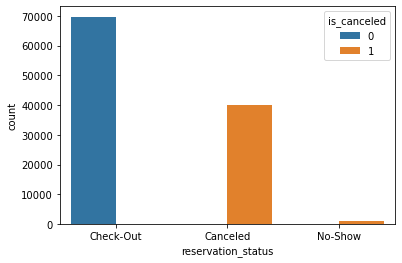

In [99]:
sns.countplot(df_stat["reservation_status"], hue=df_stat["is_canceled"])
plt.show()

In [100]:
#Droping the reservation test from train and test(it is not related to the predict result).
X_train.drop(["reservation_status_Check-Out","reservation_status_No-Show"], axis=1, inplace=True)

In [101]:
X_train.shape

(77536, 35)

In [102]:
X_test.drop(["reservation_status_Check-Out","reservation_status_No-Show"], axis=1, inplace=True)
X_test.shape

(33230, 35)

In [103]:
lr_base=LogisticRegression()
lr_base.fit(X_train, y_train)

y_pred_lr_base_train=lr_base.predict(X_train)
y_prob_lr_base_train=lr_base.predict_proba(X_train)

y_pred_lr_base_test=lr_base.predict(X_test)
y_prob_lr_base_test=lr_base.predict_proba(X_test)

In [104]:
accuracy_score_lr_base_train=accuracy_score(y_train, y_pred_lr_base_train)
print("accuracy_score_lr_base_train", accuracy_score_lr_base_train)
accuracy_score_lr_base_test=accuracy_score(y_test, y_pred_lr_base_test)
print("accuracy_score_lr_base_test", accuracy_score_lr_base_test)

accuracy_score_lr_base_train 0.7870666529096162
accuracy_score_lr_base_test 0.7866385795967499


In [105]:
Diff_lr_base_test=accuracy_score_lr_base_train-accuracy_score_lr_base_test
print("Diff_lr_base_test",abs(Diff_lr_base_test))

Diff_lr_base_test 0.0004280733128663172


In [106]:
f1_score_lr_base_train=recall_score(y_train, y_pred_lr_base_train)
print("f1_score_lr_base_train",f1_score_lr_base_train)
f1_score_lr_base_test=recall_score(y_test, y_pred_lr_base_test)
print("f1_score_lr_base_test",f1_score_lr_base_test)

f1_score_lr_base_train 0.580283455792736
f1_score_lr_base_test 0.5763730906727332


In [107]:
#Function for plotting the Confusion Matrix.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()

In [108]:
#Function for plotting the ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    plt.grid(True)

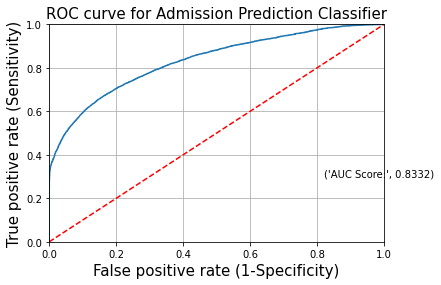

In [109]:
plot_roc(lr_base)#logicregression ROC

In [117]:
score_card = pd.DataFrame(columns=['Model_Name','Accuracy_Score_train', "Accuracy_Score_test", 'f1_score_train',"f1_score_test", "Diff_accuracy"])
Model = pd.Series({'Model_Name': "LogicRegression",
                    'Accuracy_Score_train': accuracy_score_lr_base_train*100,
                    'Accuracy_Score_test': accuracy_score_lr_base_test*100,
                     'f1_score_train': f1_score_lr_base_train*100,
                     'f1_score_test': f1_score_lr_base_test*100,
                    "Diff_accuracy":Diff_lr_base_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)
score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,LogicRegression,78.706665,78.663858,58.028346,57.637309,0.042807


In [118]:
#Naive Bayes Algorithm.

In [119]:
from sklearn.naive_bayes import BernoulliNB
Navie_bayes = BernoulliNB()

Navie_bayes.fit(X_train, y_train)
y_pred_Navie_bayes_train=Navie_bayes.predict(X_train)
y_prob_Navie_bayes_train=Navie_bayes.predict_proba(X_train)

y_pred_Navie_bayes_test=Navie_bayes.predict(X_test)
y_prob_Navie_bayes_test=Navie_bayes.predict_proba(X_test)

In [120]:
accuracy_score_Navie_bayes_train=accuracy_score(y_train, y_pred_Navie_bayes_train)
print("accuracy_score_Navie_bayes_train", accuracy_score_Navie_bayes_train)
accuracy_score_Navie_bayes_test=accuracy_score(y_test, y_pred_Navie_bayes_test)
print("accuracy_score_Navie_bayes_test", accuracy_score_Navie_bayes_test)

accuracy_score_Navie_bayes_train 0.7798184069335534
accuracy_score_Navie_bayes_test 0.780439362022269


In [121]:
classification_report_Navie_bayes_train=classification_report(y_train, y_pred_Navie_bayes_train)
print("classification_report_Navie_bayes_train\n", classification_report_Navie_bayes_train)
classification_report_Navie_bayes_test=classification_report(y_test, y_pred_Navie_bayes_test)
print("classification_report_Navie_bayes_test\n", classification_report_Navie_bayes_test)

classification_report_Navie_bayes_train
               precision    recall  f1-score   support

           0       0.80      0.88      0.83     48819
           1       0.75      0.62      0.67     28717

    accuracy                           0.78     77536
   macro avg       0.77      0.75      0.75     77536
weighted avg       0.78      0.78      0.77     77536

classification_report_Navie_bayes_test
               precision    recall  f1-score   support

           0       0.80      0.87      0.83     20922
           1       0.74      0.62      0.68     12308

    accuracy                           0.78     33230
   macro avg       0.77      0.75      0.76     33230
weighted avg       0.78      0.78      0.78     33230



In [122]:
f1_score_Navie_bayes_train=recall_score(y_train, y_pred_Navie_bayes_train)
print("f1_score_Navie_bayes_train",f1_score_Navie_bayes_train)
f1_score_Navie_bayes_test=recall_score(y_test, y_pred_Navie_bayes_test)
print("f1_score_Navie_bayes_test",f1_score_Navie_bayes_test)

f1_score_Navie_bayes_train 0.616533760490302
f1_score_Navie_bayes_test 0.6199220019499513


In [123]:
Diff_Navie_bayes_test=accuracy_score_Navie_bayes_train-accuracy_score_Navie_bayes_test
print("Diff_Navie_bayes_test",abs(Diff_Navie_bayes_test))

Diff_Navie_bayes_test 0.0006209550887156245


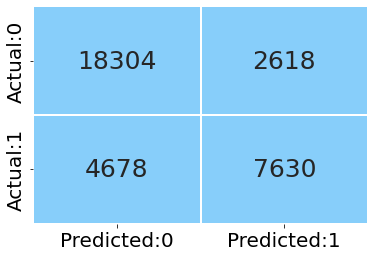

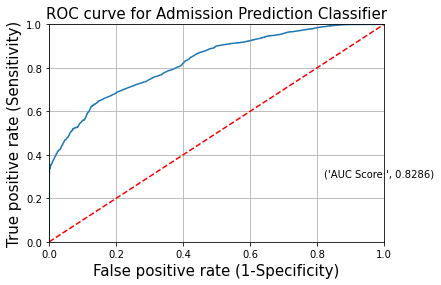

In [124]:
plot_confusion_matrix(Navie_bayes)
plot_roc(Navie_bayes)

In [125]:
score_card = pd.DataFrame(columns=['Model_Name','Accuracy_Score_train', "Accuracy_Score_test", 'f1_score_train',"f1_score_test", "Diff_accuracy"])
Model = pd.Series({'Model_Name': "Navie_bayes",
                    'Accuracy_Score_train': accuracy_score_Navie_bayes_train*100,
                    'Accuracy_Score_test': accuracy_score_Navie_bayes_test*100,
                     'f1_score_train': f1_score_Navie_bayes_train*100,
                     'f1_score_test': f1_score_Navie_bayes_test*100,
                    "Diff_accuracy":Diff_Navie_bayes_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)
score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,Navie_bayes,77.981841,78.043936,61.653376,61.9922,-0.062096


In [126]:
#Naive-Bayes Algorithm with Gridsearch
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0, 0.01, 0.1, 0.5, 1.0]}
Navie_bayes = BernoulliNB()

Navie_grid = GridSearchCV(estimator = Navie_bayes, 
                         param_grid = params, 
                         cv = 3)

NB_grid = Navie_grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', NB_grid.best_params_, '\n')

Best parameters for decision tree classifier:  {'alpha': 1.0} 



In [127]:
Navie_bayes_grid = BernoulliNB(alpha= 1.0)
Navie_bayes_grid.fit(X_train, y_train)

BernoulliNB()

In [128]:
y_pred_Navie_bayes_grid_train=Navie_bayes_grid.predict(X_train)
y_prob_Navie_bayes_grid_train=Navie_bayes_grid.predict_proba(X_train)
y_pred_Navie_bayes_grid_test=Navie_bayes_grid.predict(X_test)
y_prob_Navie_bayes_grid_test=Navie_bayes_grid.predict_proba(X_test)

In [129]:
accuracy_score_Navie_bayes_grid_train=accuracy_score(y_train, y_pred_Navie_bayes_grid_train)
print("accuracy_score_Navie_bayes_grid_train", accuracy_score_Navie_bayes_grid_train)
accuracy_score_Navie_bayes_grid_test=accuracy_score(y_test, y_pred_Navie_bayes_grid_test)
print("accuracy_score_Navie_bayes_grid_test", accuracy_score_Navie_bayes_grid_test)

accuracy_score_Navie_bayes_grid_train 0.7798184069335534
accuracy_score_Navie_bayes_grid_test 0.780439362022269


In [130]:
classification_report_Navie_bayes_grid_train=classification_report(y_train, y_pred_Navie_bayes_grid_train)
print("classification_report_Navie_bayes_grid_train\n", classification_report_Navie_bayes_grid_train)
classification_report_Navie_bayes_grid_test=classification_report(y_test, y_pred_Navie_bayes_grid_test)
print("classification_report_Navie_bayes_grid_test\n", classification_report_Navie_bayes_grid_test)

classification_report_Navie_bayes_grid_train
               precision    recall  f1-score   support

           0       0.80      0.88      0.83     48819
           1       0.75      0.62      0.67     28717

    accuracy                           0.78     77536
   macro avg       0.77      0.75      0.75     77536
weighted avg       0.78      0.78      0.77     77536

classification_report_Navie_bayes_grid_test
               precision    recall  f1-score   support

           0       0.80      0.87      0.83     20922
           1       0.74      0.62      0.68     12308

    accuracy                           0.78     33230
   macro avg       0.77      0.75      0.76     33230
weighted avg       0.78      0.78      0.78     33230



In [131]:
f1_score_Navie_bayes_grid_train=recall_score(y_train, y_pred_Navie_bayes_grid_train)
print("f1_score_Navie_bayes_grid_train",f1_score_Navie_bayes_grid_train)
f1_score_Navie_bayes_grid_test=recall_score(y_test, y_pred_Navie_bayes_grid_test)
print("f1_score_Navie_bayes_grid_test",f1_score_Navie_bayes_grid_test)

f1_score_Navie_bayes_grid_train 0.616533760490302
f1_score_Navie_bayes_grid_test 0.6199220019499513


In [132]:
Diff_Navie_bayes_grid_test=accuracy_score_Navie_bayes_grid_train-accuracy_score_Navie_bayes_grid_test
print("Diff_Navie_bayes_grid_test",abs(Diff_Navie_bayes_grid_test))

Diff_Navie_bayes_grid_test 0.0006209550887156245


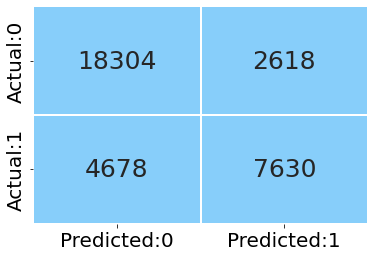

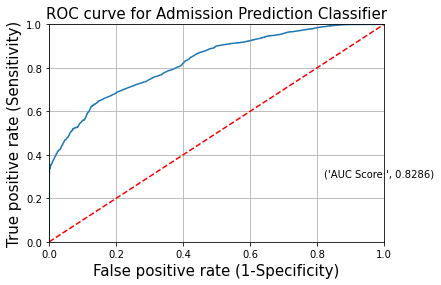

In [133]:
plot_confusion_matrix(Navie_bayes_grid)
plot_roc(Navie_bayes_grid)

In [134]:
Model = pd.Series({'Model_Name': "Navie_bayes_grid",
                    'Accuracy_Score_train': accuracy_score_Navie_bayes_grid_train*100,
                    'Accuracy_Score_test': accuracy_score_Navie_bayes_grid_test*100,
                     'f1_score_train': f1_score_Navie_bayes_grid_train*100,
                     'f1_score_test': f1_score_Navie_bayes_grid_test*100,
                    "Diff_accuracy":Diff_Navie_bayes_grid_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)

score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,Navie_bayes,77.981841,78.043936,61.653376,61.9922,-0.062096
1,Navie_bayes_grid,77.981841,78.043936,61.653376,61.9922,-0.062096


In [237]:
#AdaBoost Algorithm.
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators = 12, random_state = 10)

ada_model.fit(X_train, y_train)
y_pred_ada_model_train=ada_model.predict(X_train)
y_prob_ada_model_train=ada_model.predict_proba(X_train)

y_pred_ada_model_test=ada_model.predict(X_test)
y_prob_ada_model_test=ada_model.predict_proba(X_test)

In [137]:
accuracy_score_ada_model_train=accuracy_score(y_train, y_pred_ada_model_train)
print("accuracy_score_ada_model_train", accuracy_score_ada_model_train)
accuracy_score_ada_model_test=accuracy_score(y_test, y_pred_ada_model_test)
print("accuracy_score_ada_model_test", accuracy_score_ada_model_test)

accuracy_score_ada_model_train 0.8105009286009079
accuracy_score_ada_model_test 0.81017153174842


In [138]:
classification_report_ada_model_train=classification_report(y_train, y_pred_ada_model_train)
print("classification_report_ada_model_train\n", classification_report_ada_model_train)
classification_report_ada_model_test=classification_report(y_test, y_pred_ada_model_test)
print("classification_report_ada_model_test\n", classification_report_ada_model_test)

classification_report_ada_model_train
               precision    recall  f1-score   support

           0       0.80      0.94      0.86     48819
           1       0.85      0.60      0.70     28717

    accuracy                           0.81     77536
   macro avg       0.82      0.77      0.78     77536
weighted avg       0.82      0.81      0.80     77536

classification_report_ada_model_test
               precision    recall  f1-score   support

           0       0.80      0.93      0.86     20922
           1       0.84      0.60      0.70     12308

    accuracy                           0.81     33230
   macro avg       0.82      0.77      0.78     33230
weighted avg       0.81      0.81      0.80     33230



In [139]:
f1_score_ada_model_train=recall_score(y_train, y_pred_ada_model_train)
print("f1_score_ada_model_train",f1_score_ada_model_train)
f1_score_ada_model_test=recall_score(y_test, y_pred_ada_model_test)
print("f1_score_ada_model_test",f1_score_ada_model_test)

f1_score_ada_model_train 0.597694745272835
f1_score_ada_model_test 0.6000974975625609


In [140]:
Diff_ada_model_test=accuracy_score_ada_model_train-accuracy_score_ada_model_test
print("Diff_ada_model_test",abs(Diff_ada_model_test))

Diff_ada_model_test 0.0003293968524878954


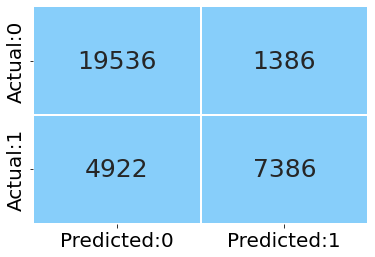

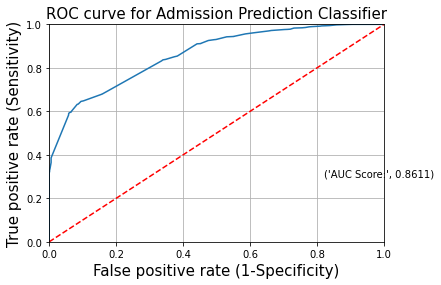

In [141]:
plot_confusion_matrix(ada_model)
plot_roc(ada_model)

In [142]:
Model = pd.Series({'Model_Name': "Ada_model",
                    'Accuracy_Score_train': accuracy_score_ada_model_train*100,
                    'Accuracy_Score_test': accuracy_score_ada_model_test*100,
                     'f1_score_train': f1_score_ada_model_train*100,
                     'f1_score_test': f1_score_ada_model_test*100,
                    "Diff_accuracy":Diff_ada_model_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)
score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,Navie_bayes,77.981841,78.043936,61.653376,61.9922,-0.062096
1,Navie_bayes_grid,77.981841,78.043936,61.653376,61.9922,-0.062096
2,Ada_model,81.050093,81.017153,59.769475,60.00975,0.03294


In [244]:
feature_importances= pd.DataFrame({'Variable': X_train.columns, 'feature_importances': (ada_model.feature_importances_)*100})
sorted_feature_imp = feature_importances.sort_values('feature_importances', ascending = False)
sorted_feature_imp.head(6)

,Variable,feature_importances
0,lead_time,16.666667
12,Desired_Room,16.666667
7,booking_changes,8.333333
23,market_segment_Online TA,8.333333
27,deposit_type_Non Refund,8.333333
13,total_bookings,8.333333


In [197]:
# AdaBoost with Gridsearch
tuning_parameters = {'learning_rate': [0.5, 0.6,0.7,0.8,0.9],
                     'n_estimators': range(2,25)}

ada_model= AdaBoostClassifier( base_estimator=Navie_bayes_grid, random_state = 10)

ada_grid = GridSearchCV(estimator = ada_model, param_grid = tuning_parameters, cv = 5, scoring = 'roc_auc')

ada_grid.fit(X_train, y_train)

print('Best parameters for XGBoost classifier: ', ada_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'learning_rate': 0.9, 'n_estimators': 24} 



In [144]:
ada_grid = AdaBoostClassifier(n_estimators = 24,  learning_rate=0.7, random_state = 10)

ada_grid.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=24, random_state=10)

In [145]:
y_pred_ada_grid_train=ada_grid.predict(X_train)
y_prob_ada_grid_train=ada_grid.predict_proba(X_train)

y_pred_ada_grid_test=ada_grid.predict(X_test)
y_prob_ada_grid_test=ada_grid.predict_proba(X_test)

In [146]:
accuracy_score_ada_grid_train=accuracy_score(y_train, y_pred_ada_grid_train)
print("accuracy_score_ada_grid_train", accuracy_score_ada_grid_train)
accuracy_score_ada_grid_test=accuracy_score(y_test, y_pred_ada_grid_test)
print("accuracy_score_ada_grid_train", accuracy_score_ada_grid_test)

accuracy_score_ada_grid_train 0.8122678497730087
accuracy_score_ada_grid_train 0.8107733975323503


In [147]:
classification_report_ada_grid_train=classification_report(y_train, y_pred_ada_grid_train)
print("classification_report_ada_grid_train\n", classification_report_ada_grid_train)
classification_report_ada_grid_test=classification_report(y_test, y_pred_ada_grid_test)
print("classification_report_ada_grid_test\n", classification_report_ada_grid_test)

classification_report_ada_grid_train
               precision    recall  f1-score   support

           0       0.80      0.93      0.86     48819
           1       0.84      0.61      0.71     28717

    accuracy                           0.81     77536
   macro avg       0.82      0.77      0.78     77536
weighted avg       0.82      0.81      0.80     77536

classification_report_ada_grid_test
               precision    recall  f1-score   support

           0       0.80      0.93      0.86     20922
           1       0.83      0.61      0.70     12308

    accuracy                           0.81     33230
   macro avg       0.82      0.77      0.78     33230
weighted avg       0.81      0.81      0.80     33230



In [148]:
f1_score_ada_grid_train=recall_score(y_train, y_pred_ada_grid_train)
print("f1_score_ada_grid_train",f1_score_ada_grid_train)
f1_score_ada_grid_test=recall_score(y_test, y_pred_ada_grid_test)
print("f1_score_ada_grid_test",f1_score_ada_grid_test)

f1_score_ada_grid_train 0.6081763415398544
f1_score_ada_grid_test 0.6103347416314592


In [149]:
Diff_ada_grid_test=accuracy_score_ada_grid_train-accuracy_score_ada_grid_test
print("Diff_ada_grid_test",abs(Diff_ada_grid_test))

Diff_ada_grid_test 0.0014944522406583616


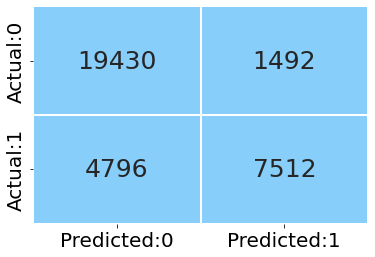

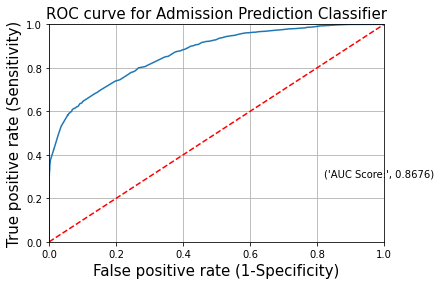

In [150]:
plot_confusion_matrix(ada_grid)
plot_roc(ada_grid)

In [151]:
Model = pd.Series({'Model_Name': "Ada_grid",
                    'Accuracy_Score_train': accuracy_score_ada_grid_train*100,
                    'Accuracy_Score_test': accuracy_score_ada_grid_test*100,
                     'f1_score_train': f1_score_ada_grid_train*100,
                     'f1_score_test': f1_score_ada_grid_test*100,
                    "Diff_accuracy":Diff_ada_grid_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)

score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,Navie_bayes,77.981841,78.043936,61.653376,61.9922,-0.062096
1,Navie_bayes_grid,77.981841,78.043936,61.653376,61.9922,-0.062096
2,Ada_model,81.050093,81.017153,59.769475,60.00975,0.03294
3,Ada_grid,81.226785,81.07734,60.817634,61.033474,0.149445


In [153]:
#score_card.drop([3,4],inplace=True)
#score_card

In [ ]:
#score_card=score_card.reset_index(drop=True)
#score_card

In [155]:
"""
feature_importances= pd.DataFrame({'Variable':X_train.columns, 'AdaBoostClassifier':ada_model.feature_importances_ })
sorted_feature_imp = feature_importances.sort_values('AdaBoostClassifier', ascending = False)
sorted_feature_imp
"""

"\nfeature_importances= pd.DataFrame({'Variable':X_train.columns, 'AdaBoostClassifier':ada_model.feature_importances_ })\nsorted_feature_imp = feature_importances.sort_values('AdaBoostClassifier', ascending = False)\nsorted_feature_imp\n"

In [156]:
#Xgboost
import xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

xgb_model.fit(X_train, y_train)
y_pred_xgb_model_train=xgb_model.predict(X_train)
y_prob_xgb_model_train=xgb_model.predict_proba(X_train)

y_pred_xgb_model_test=xgb_model.predict(X_test)
y_prob_xgb_model_test=xgb_model.predict_proba(X_test)

In [157]:
accuracy_score_xgb_model_train=accuracy_score(y_train, y_pred_xgb_model_train)
print("accuracy_score_xgb_model_train", accuracy_score_xgb_model_train)
accuracy_score_xgb_model_test=accuracy_score(y_test, y_pred_xgb_model_test)
print("accuracy_score_xgb_model_test", accuracy_score_xgb_model_test)

accuracy_score_xgb_model_train 0.9001754023937267
accuracy_score_xgb_model_test 0.8480288895576287


In [158]:
classification_report_xgb_model_train=classification_report(y_train, y_pred_xgb_model_train)
print("classification_report_xgb_model_train\n", classification_report_xgb_model_train)
classification_report_xgb_model_test=classification_report(y_test, y_pred_xgb_model_test)
print("classification_report_xgb_model_test\n", classification_report_xgb_model_test)

classification_report_xgb_model_train
               precision    recall  f1-score   support

           0       0.90      0.95      0.92     48819
           1       0.90      0.82      0.86     28717

    accuracy                           0.90     77536
   macro avg       0.90      0.88      0.89     77536
weighted avg       0.90      0.90      0.90     77536

classification_report_xgb_model_test
               precision    recall  f1-score   support

           0       0.85      0.91      0.88     20922
           1       0.84      0.73      0.78     12308

    accuracy                           0.85     33230
   macro avg       0.84      0.82      0.83     33230
weighted avg       0.85      0.85      0.85     33230



In [159]:
f1_score_xgb_model_train=recall_score(y_train, y_pred_xgb_model_train)
print("f1_score_xgb_model_train",f1_score_xgb_model_train)
f1_score_xgb_model_test=recall_score(y_test, y_pred_xgb_model_test)
print("f1_score_xgb_model_test",f1_score_xgb_model_test)

f1_score_xgb_model_train 0.8179127346171258
f1_score_xgb_model_test 0.7346441338966526


In [160]:
Diff_xgb_model_test=accuracy_score_xgb_model_train-accuracy_score_xgb_model_test
print("Diff_xgb_model_test",abs(Diff_xgb_model_test))

Diff_xgb_model_test 0.05214651283609806


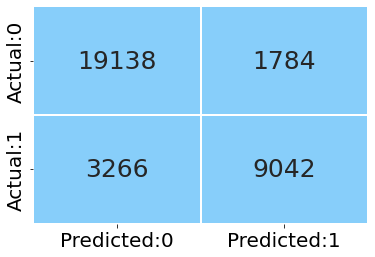

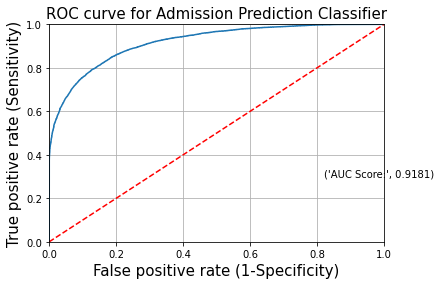

In [161]:
plot_confusion_matrix(xgb_model)
plot_roc(xgb_model)

In [162]:
Model = pd.Series({'Model_Name': "xgb_model",
                    'Accuracy_Score_train': accuracy_score_xgb_model_train*100,
                    'Accuracy_Score_test': accuracy_score_xgb_model_test*100,
                     'f1_score_train': f1_score_xgb_model_train*100,
                     'f1_score_test': f1_score_xgb_model_test*100,
                    "Diff_accuracy":Diff_xgb_model_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)

score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,Navie_bayes,77.981841,78.043936,61.653376,61.9922,-0.062096
1,Navie_bayes_grid,77.981841,78.043936,61.653376,61.9922,-0.062096
2,Ada_model,81.050093,81.017153,59.769475,60.00975,0.03294
3,Ada_grid,81.226785,81.07734,60.817634,61.033474,0.149445
4,xgb_model,90.01754,84.802889,81.791273,73.464413,5.214651


In [163]:
#XgBoost Algorithm with Gridsearch
tuning_parameters = {'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1],
                     'max_depth': range(1,10),
                     'n_estimators': range(2,10)}

xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

xgb_grid.fit(X_train, y_train)

print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'learning_rate': 0.8, 'max_depth': 9, 'n_estimators': 9} 



In [164]:
xgb_grid = XGBClassifier(max_depth = 9, n_estimators = 9, learning_rate= 0.8)

xgb_grid.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=9, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [166]:
y_pred_xgb_grid_train=xgb_grid.predict(X_train)
y_prob_xgb_grid_train=xgb_grid.predict_proba(X_train)

y_pred_xgb_grid_test=xgb_grid.predict(X_test)
y_prob_xgb_grid_test=xgb_grid.predict_proba(X_test)

In [167]:
accuracy_score_xgb_grid_train=accuracy_score(y_train, y_pred_xgb_grid_train)
print("accuracy_score_xgb_grid_train", accuracy_score_xgb_grid_train)
accuracy_score_xgb_grid_test=accuracy_score(y_test, y_pred_xgb_grid_test)
print("accuracy_score_xgb_grid_test", accuracy_score_xgb_grid_test)

accuracy_score_xgb_grid_train 0.8436339248865043
accuracy_score_xgb_grid_test 0.8308757147156184


In [168]:
classification_report_xgb_grid_train=classification_report(y_train, y_pred_xgb_grid_train)
print("classification_report_xgb_grid_train\n", classification_report_xgb_grid_train)
classification_report_xgb_grid_test=classification_report(y_test, y_pred_xgb_grid_test)
print("classification_report_xgb_grid_test\n", classification_report_xgb_grid_test)

classification_report_xgb_grid_train
               precision    recall  f1-score   support

           0       0.85      0.92      0.88     48819
           1       0.84      0.72      0.77     28717

    accuracy                           0.84     77536
   macro avg       0.84      0.82      0.83     77536
weighted avg       0.84      0.84      0.84     77536

classification_report_xgb_grid_test
               precision    recall  f1-score   support

           0       0.84      0.91      0.87     20922
           1       0.82      0.70      0.75     12308

    accuracy                           0.83     33230
   macro avg       0.83      0.80      0.81     33230
weighted avg       0.83      0.83      0.83     33230



In [169]:
f1_score_xgb_grid_train=recall_score(y_train, y_pred_xgb_grid_train)
print("f1_score_xgb_grid_train",f1_score_xgb_grid_train)
f1_score_xgb_grid_test=recall_score(y_test, y_pred_xgb_grid_test)
print("f1_score_xgb_grid_test",f1_score_xgb_grid_test)

f1_score_xgb_grid_train 0.7154298847372637
f1_score_xgb_grid_test 0.6956451088722782


In [170]:
Diff_xgb_grid_test=accuracy_score_xgb_grid_train-accuracy_score_xgb_grid_test
print("Diff_xgb_grid_test",abs(Diff_xgb_grid_test))

Diff_xgb_grid_test 0.012758210170885964


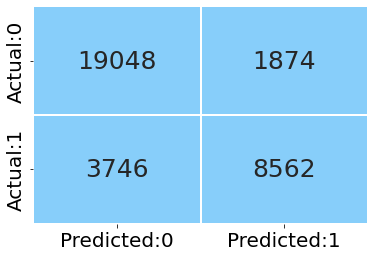

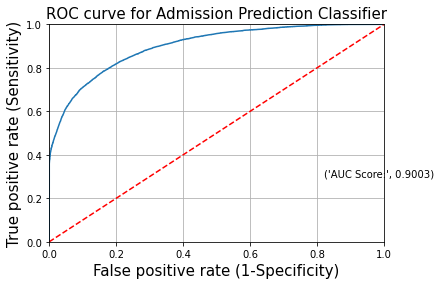

In [172]:
plot_confusion_matrix(xgb_grid)
plot_roc(xgb_grid)

In [173]:
Model = pd.Series({'Model_Name': "xgb_grid",
                    'Accuracy_Score_train': accuracy_score_xgb_grid_train*100,
                    'Accuracy_Score_test': accuracy_score_xgb_grid_test*100,
                     'f1_score_train': f1_score_xgb_grid_train*100,
                     'f1_score_test': f1_score_xgb_grid_test*100,
                    "Diff_accuracy":Diff_xgb_grid_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)

score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,Navie_bayes,77.981841,78.043936,61.653376,61.9922,-0.062096
1,Navie_bayes_grid,77.981841,78.043936,61.653376,61.9922,-0.062096
2,Ada_model,81.050093,81.017153,59.769475,60.00975,0.03294
3,Ada_grid,81.226785,81.07734,60.817634,61.033474,0.149445
4,xgb_model,90.01754,84.802889,81.791273,73.464413,5.214651
5,xgb_grid,84.363392,83.087571,71.542988,69.564511,1.275821


In [198]:
#Voting Classifier
import xgboost
from sklearn.ensemble import VotingClassifier

classifiers=[("Navie Bayes",Navie_bayes_grid),("Xgboost",xgb_model),("Ada",ada_model)]
voting_classifier=VotingClassifier(estimators=classifiers,voting='soft',weights=[0.1,0.8,0.9])
voting_classifier.fit(X_train, y_train)
y_pred_voting_classifier_train=voting_classifier.predict(X_train)
y_prob_voting_classifier_train=voting_classifier.predict_proba(X_train)
y_pred_voting_classifier_test=voting_classifier.predict(X_test)
y_prob_voting_classifier_test=voting_classifier.predict_proba(X_test)

In [199]:
accuracy_score_voting_classifier_train=accuracy_score(y_train, y_pred_voting_classifier_train)
print("accuracy_score_voting_classifier_train", accuracy_score_voting_classifier_train)
accuracy_score_voting_classifier_test=accuracy_score(y_test, y_pred_voting_classifier_test)
print("accuracy_score_voting_classifier_test", accuracy_score_voting_classifier_test)

accuracy_score_voting_classifier_train 0.8561313454395377
accuracy_score_voting_classifier_test 0.8420102317183268


In [200]:
classification_report_voting_classifier_train=classification_report(y_train, y_pred_voting_classifier_train)
print("classification_report_voting_classifier_train\n", classification_report_voting_classifier_train)
classification_report_voting_classifier_test=classification_report(y_test, y_pred_voting_classifier_test)
print("classification_report_voting_classifier_test\n", classification_report_voting_classifier_test)

classification_report_voting_classifier_train
               precision    recall  f1-score   support

           0       0.86      0.93      0.89     48819
           1       0.86      0.73      0.79     28717

    accuracy                           0.86     77536
   macro avg       0.86      0.83      0.84     77536
weighted avg       0.86      0.86      0.85     77536

classification_report_voting_classifier_test
               precision    recall  f1-score   support

           0       0.84      0.92      0.88     20922
           1       0.84      0.71      0.77     12308

    accuracy                           0.84     33230
   macro avg       0.84      0.81      0.82     33230
weighted avg       0.84      0.84      0.84     33230



In [201]:
f1_score_voting_classifier_train=recall_score(y_train, y_pred_voting_classifier_train)
print("f1_score_voting_classifier_train",f1_score_voting_classifier_train)
f1_score_voting_classifier_test=recall_score(y_test, y_pred_voting_classifier_test)
print("f1_score_voting_classifier_test",f1_score_voting_classifier_test)

f1_score_voting_classifier_train 0.7335376257965665
f1_score_voting_classifier_test 0.7104322391940201


In [202]:
Diff_voting_classifier_test=accuracy_score_voting_classifier_train-accuracy_score_voting_classifier_test
print("Diff_voting_classifier_test",abs(Diff_voting_classifier_test))

Diff_voting_classifier_test 0.014121113721210943


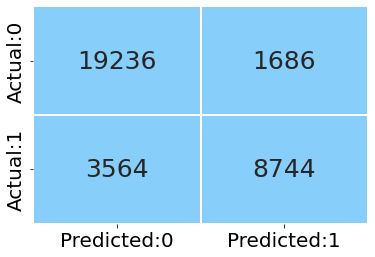

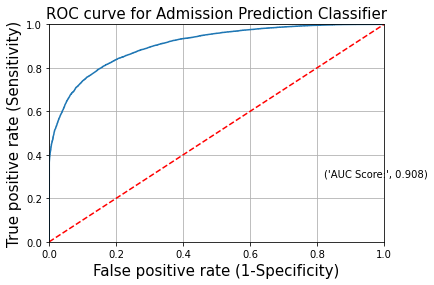

In [185]:
plot_confusion_matrix(voting_classifier)
plot_roc(voting_classifier)

In [186]:
Model = pd.Series({'Model_Name': "voting_classifier",
                    'Accuracy_Score_train': accuracy_score_voting_classifier_train*100,
                    'Accuracy_Score_test': accuracy_score_voting_classifier_test*100,
                     'f1_score_train': f1_score_voting_classifier_train*100,
                     'f1_score_test': f1_score_voting_classifier_test*100,
                    "Diff_accuracy":Diff_voting_classifier_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)
score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,Navie_bayes,77.981841,78.043936,61.653376,61.9922,-0.062096
1,Navie_bayes_grid,77.981841,78.043936,61.653376,61.9922,-0.062096
2,Ada_model,81.050093,81.017153,59.769475,60.00975,0.03294
3,Ada_grid,81.226785,81.07734,60.817634,61.033474,0.149445
4,xgb_model,90.01754,84.802889,81.791273,73.464413,5.214651
5,xgb_grid,84.363392,83.087571,71.542988,69.564511,1.275821
6,voting_classifier,85.613135,84.201023,73.353763,71.043224,1.412111


In [213]:
 def __get_feature_importances(model, train_columns):
    feature_imp = dict()
    for est in model.estimators_:
        #print(est)
        if  type(est) == XGBClassifier:
            feature_imp1=est.feature_importances_
        elif type(est)== BernoulliNB:
            feature_imp2=abs(est.coef_[0])
        #elif type(est)== AdaBoostClassifier:
            #feature_imp4=est.feature_importances_
        
    feature_importances= pd.DataFrame({'Variable': train_columns, 'xgboost': feature_imp1*100, 'NaiveBytes':feature_imp2})#'AdaBoostClassifier':feature_imp4*100 })
    sorted_feature_imp = feature_importances.sort_values('xgboost', ascending = False)
    return sorted_feature_imp

In [214]:
sorted_feature_imp=__get_feature_importances(voting_classifier,X_train.columns)

In [215]:
sorted_feature_imp

,Variable,xgboost,NaiveBytes
27,deposit_type_Non Refund,66.021172,1.124217
12,Desired_Room,6.295655,0.018201
10,required_car_parking_spaces,5.969285,10.265314
23,market_segment_Online TA,2.489689,0.734050
13,total_bookings,2.312993,1.940735
11,total_of_special_requests,2.062037,1.400850
6,is_repeated_guest,1.783621,5.870865
30,customer_type_Transient,1.246327,0.191957
31,customer_type_Transient-Party,1.134749,1.931083
26,distribution_channel_TA/TO,0.900104,0.094130


In [219]:
sorted_feature_imp.head(6)

,Variable,xgboost,NaiveBytes
27,deposit_type_Non Refund,66.021172,1.124217
12,Desired_Room,6.295655,0.018201
10,required_car_parking_spaces,5.969285,10.265314
23,market_segment_Online TA,2.489689,0.734050
13,total_bookings,2.312993,1.940735
11,total_of_special_requests,2.062037,1.400850


In [220]:
lt=pd.crosstab(df_stat["is_canceled"],df_stat["lead_time"])
lt

lead_time,0,1,2,3,4,5,6,7,8,9,...,423,426,433,434,435,437,440,443,444,445
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,5340,2944,1764,1531,1455,1277,1162,1115,885,728,...,74,0,0,21,0,0,0,0,0,3
1,380,299,205,167,159,198,192,159,208,206,...,34,32,52,4,1,40,32,22,40,0


In [221]:
x1 = lt.columns
x1

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            423, 426, 433, 434, 435, 437, 440, 443, 444, 445],
           dtype='int64', name='lead_time', length=415)

In [222]:
y1=lt.loc[1]-lt.loc[0]
y1

lead_time
0     -4960
1     -2645
2     -1559
3     -1364
4     -1296
       ... 
437      40
440      32
443      22
444      40
445      -3
Length: 415, dtype: int64

Text(0.5, 0, 'difference:lead time(is_canceled(1)-is_canceled(0)) & difference>0')

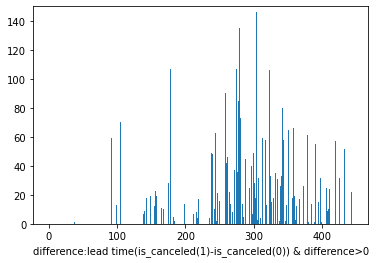

In [223]:
plt.ylim(0, 150)
plt.bar(x1,y1)
plt.xlabel('difference:lead time(is_canceled(1)-is_canceled(0)) & difference>0')

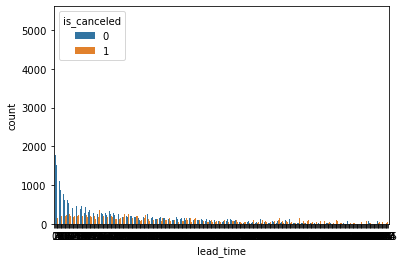

In [234]:
sns.countplot(df_stat["lead_time"], hue=df_stat["is_canceled"])
plt.show()

In [225]:
pd.crosstab(df_stat["is_canceled"],df_stat["deposit_type"])

deposit_type,No Deposit,Non Refund,Refundable
is_canceled,,,
0,69532,93,116
1,27697,13297,31


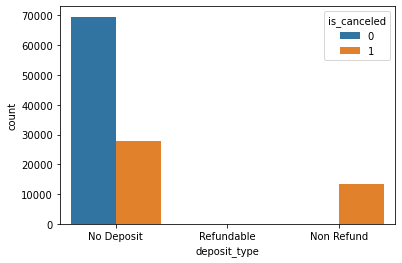

In [226]:
sns.countplot(df_stat["deposit_type"], hue=df_stat["is_canceled"])
plt.show()

In [227]:
pd.crosstab(df_stat["is_canceled"],df_stat["required_car_parking_spaces"])

required_car_parking_spaces,0,1,2,3,8
is_canceled,,,,,
0,62821,6893,24,2,1
1,41025,0,0,0,0


In [228]:
pd.crosstab(df_stat["is_canceled"],df_stat["Desired_Room"])

Desired_Room,0,1
is_canceled,,
0,12932,56809
1,724,40301


In [229]:
pd.crosstab(df_stat["is_canceled"],df_stat["is_repeated_guest"])

is_repeated_guest,0,1
is_canceled,,
0,67976,1765
1,40918,107


In [230]:
lt2=pd.crosstab(df_stat["is_canceled"],df_stat["total_bookings"])
lt2

total_bookings,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,66645,1297,500,284,199,148,104,78,64,56,...,1,1,1,1,1,1,1,1,1,1
1,35140,5568,58,27,15,11,16,6,2,2,...,0,0,0,0,0,0,0,0,0,0


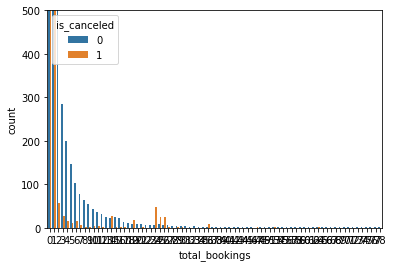

In [231]:
sns.countplot(df_stat["total_bookings"], hue=df_stat["is_canceled"])
plt.ylim(0,500)
plt.show()